In [0]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [18]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [19]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


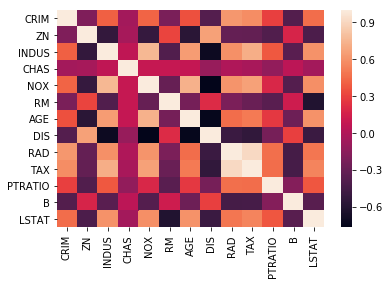

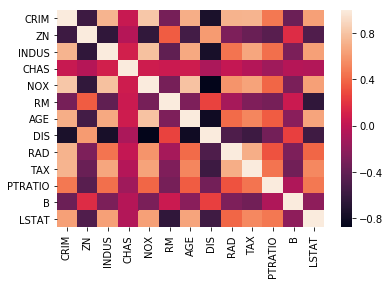

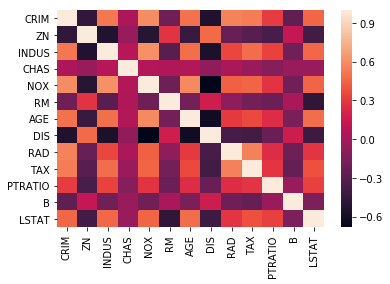

In [20]:
import seaborn as nsn
import matplotlib.pyplot as plt

sns.heatmap(df.corr(method='pearson'))
plt.show()

sns.heatmap(df.corr(method='spearman'))
plt.show()

sns.heatmap(df.corr(method='kendall'))
plt.show()

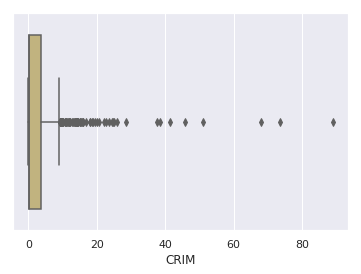

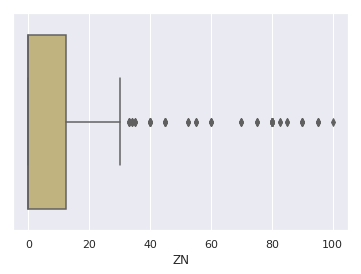

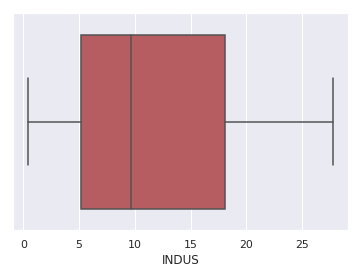

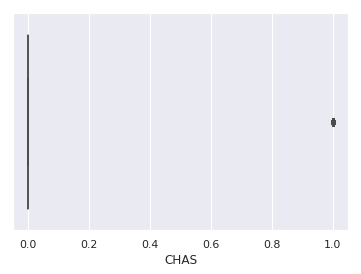

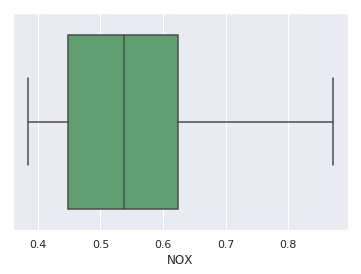

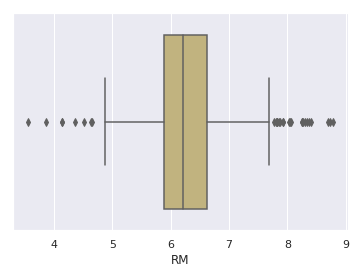

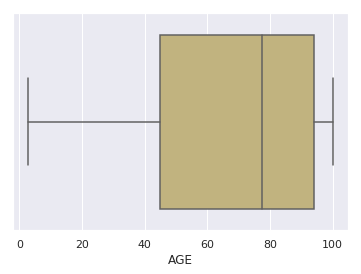

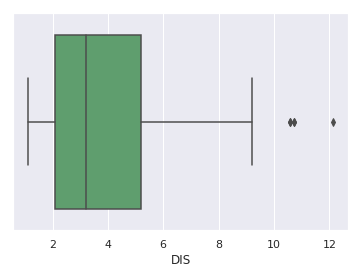

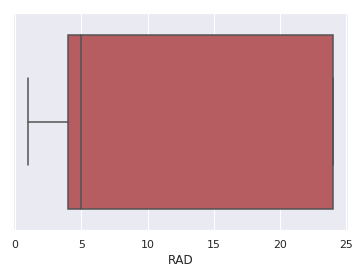

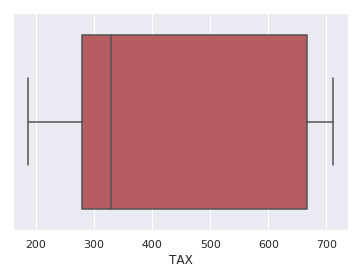

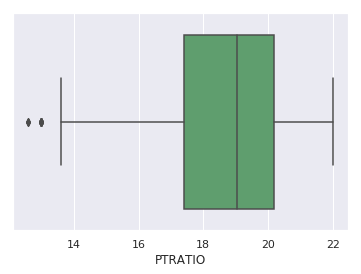

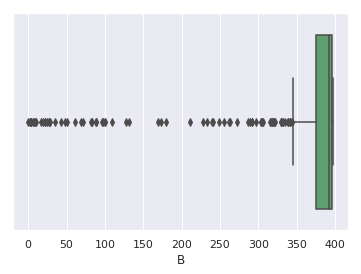

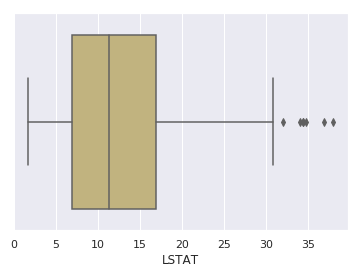

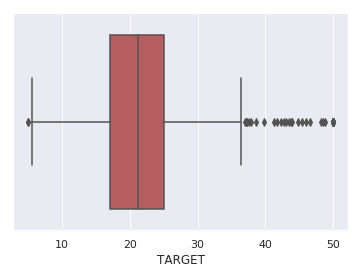

In [21]:
import numpy as np
sns.set(color_codes=True)
colors =['y', 'b', 'g', 'r']

df['TARGET'] = dataset.target
cols = list(df.columns.values)

for col in cols:
  sns.boxplot(df[col], color=np.random.choice(colors))
  plt.show()

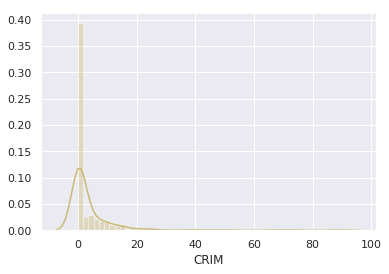

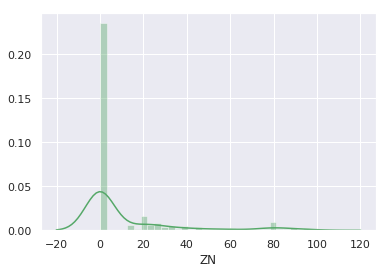

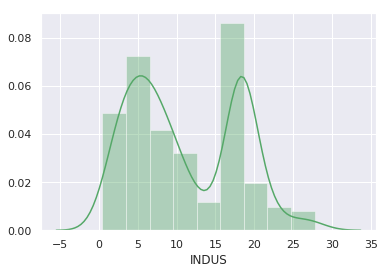

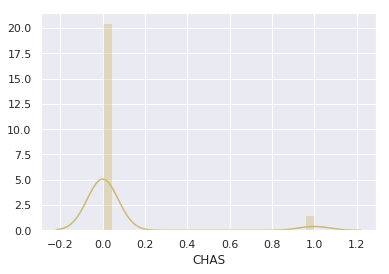

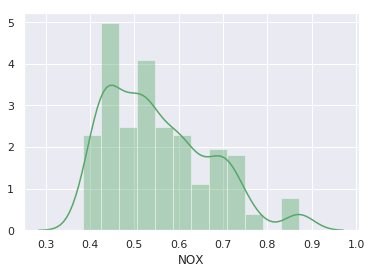

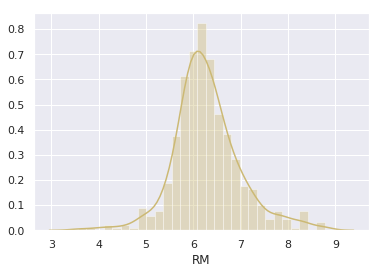

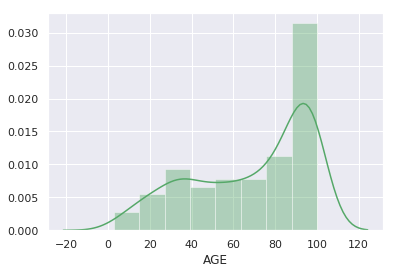

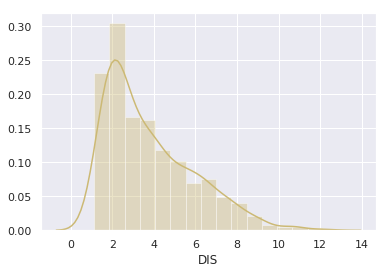

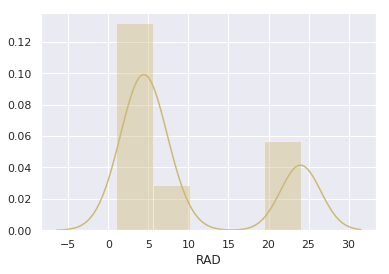

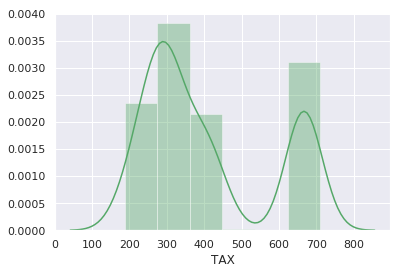

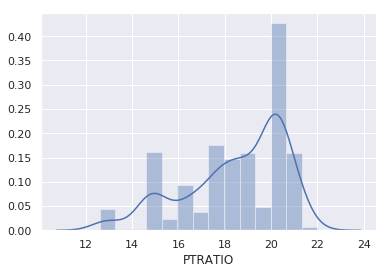

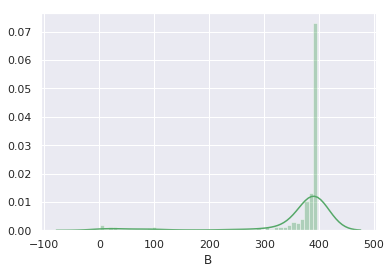

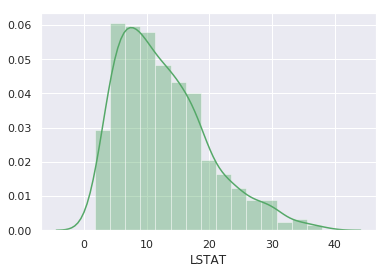

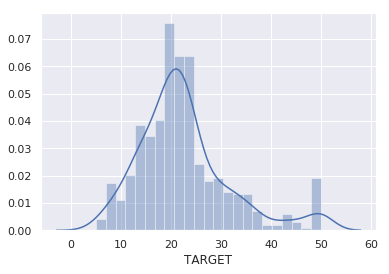

In [22]:
for col in cols:
  sns.distplot(df[col], color=np.random.choice(colors))
  plt.show()

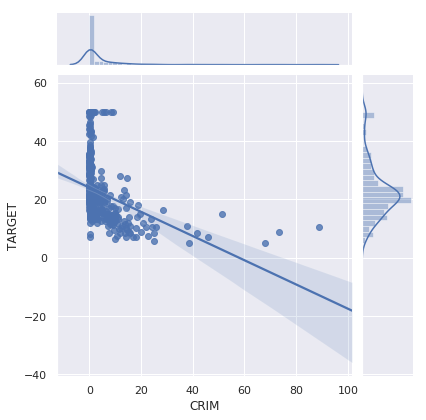

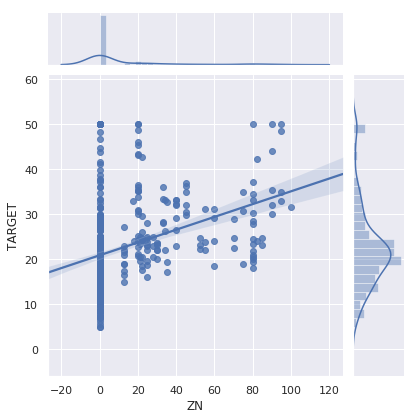

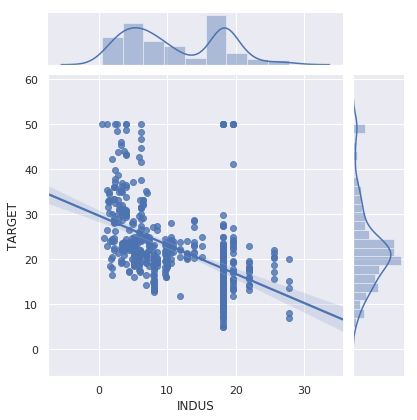

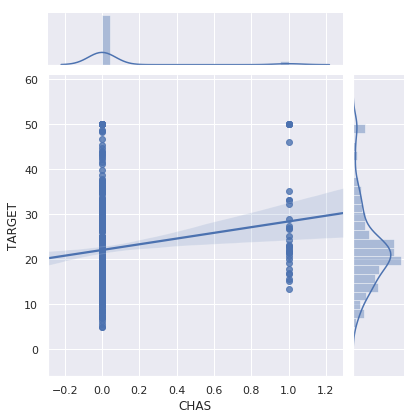

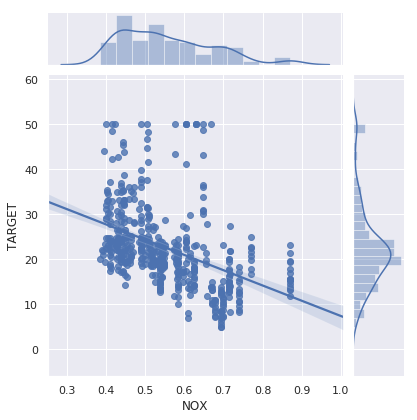

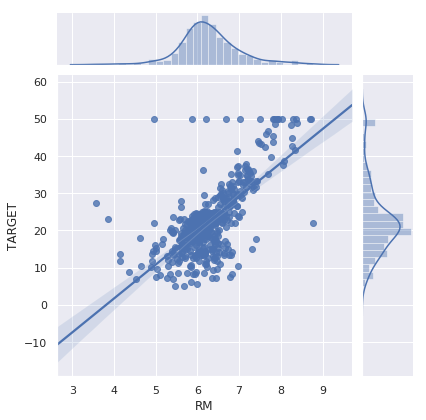

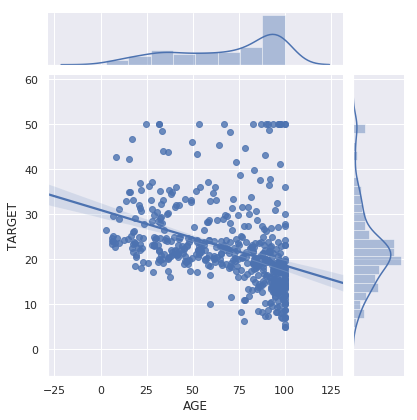

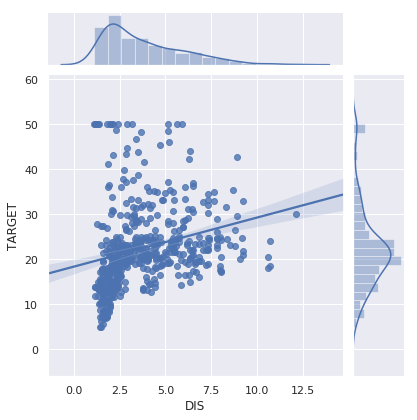

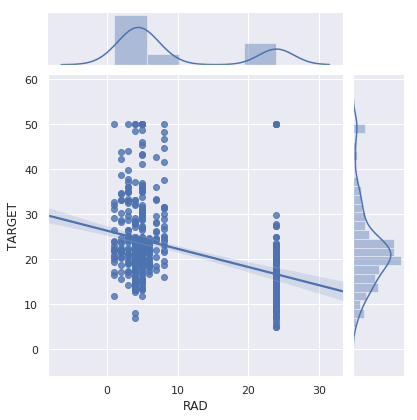

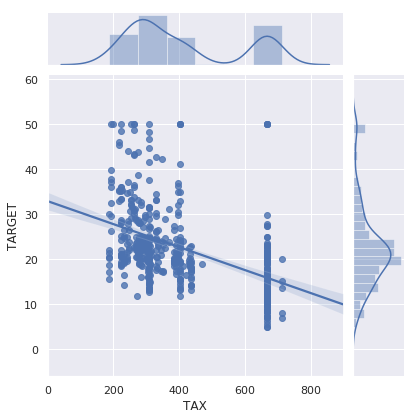

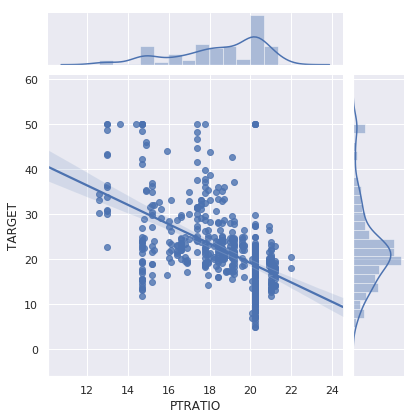

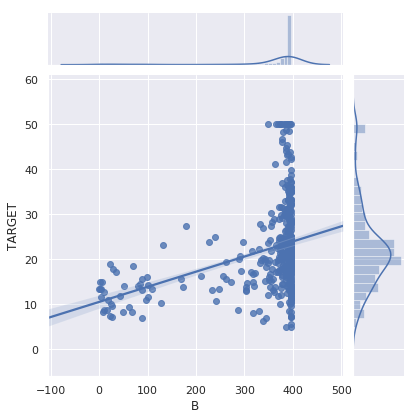

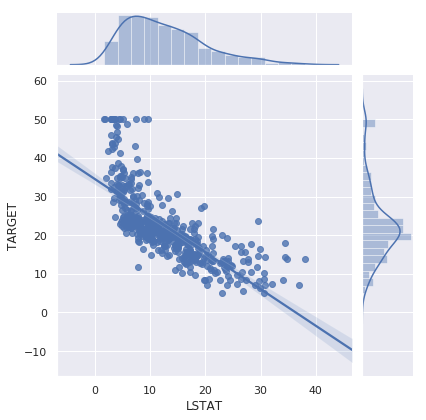

In [23]:
for col in cols:
  if (col == 'TARGET'):
    continue
  sns.jointplot(x=col, y='TARGET', data=df, kind='reg')
  plt.show()

In [24]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [25]:
import numpy as np
def print_null_info(df, mask):
  print('Numero de valores nulos')
  print(df.isnull().sum())
  print('Proporcao de valores nulos')
  print(df.isnull().sum()/len(df))
  
  print('Valores na máscara')
  print(df[mask].head(10))
  
df_null = df[['AGE']]
mask = np.random.choice([True, False], size=df_null.shape, p=[.1,.9])
df_null = df_null.mask(mask)
print_null_info(df_null, mask)

Numero de valores nulos
AGE    59
dtype: int64
Proporcao de valores nulos
AGE    0.116601
dtype: float64
Valores na máscara
    AGE
7   NaN
12  NaN
13  NaN
15  NaN
38  NaN
44  NaN
48  NaN
61  NaN
62  NaN
63  NaN


In [0]:
from sklearn.impute import SimpleImputer

def impute(df, strategy, fill_value=None):
  df_clean = df.copy()
  imp = SimpleImputer(missing_values=np.nan, strategy=strategy, fill_value=fill_value)
  df_clean.loc[:, "AGE"] = imp.fit_transform(df)
  
  return df_clean



In [27]:
strategies = ['median', 'mean', 'most_frequent']
for strategy in strategies:
  df_clean = impute(df_null, strategy)
  print_null_info(df_clean, mask)

Numero de valores nulos
AGE    0
dtype: int64
Proporcao de valores nulos
AGE    0.0
dtype: float64
Valores na máscara
     AGE
7   77.7
12  77.7
13  77.7
15  77.7
38  77.7
44  77.7
48  77.7
61  77.7
62  77.7
63  77.7
Numero de valores nulos
AGE    0
dtype: int64
Proporcao de valores nulos
AGE    0.0
dtype: float64
Valores na máscara
          AGE
7   68.483445
12  68.483445
13  68.483445
15  68.483445
38  68.483445
44  68.483445
48  68.483445
61  68.483445
62  68.483445
63  68.483445
Numero de valores nulos
AGE    0
dtype: int64
Proporcao de valores nulos
AGE    0.0
dtype: float64
Valores na máscara
      AGE
7   100.0
12  100.0
13  100.0
15  100.0
38  100.0
44  100.0
48  100.0
61  100.0
62  100.0
63  100.0


In [28]:
df_clean = impute(df_null, 'constant', fill_value=200)
print_null_info(df_clean, mask)

Numero de valores nulos
AGE    0
dtype: int64
Proporcao de valores nulos
AGE    0.0
dtype: float64
Valores na máscara
      AGE
7   200.0
12  200.0
13  200.0
15  200.0
38  200.0
44  200.0
48  200.0
61  200.0
62  200.0
63  200.0


In [0]:
from scipy import stats
df_rm = df[['RM']].copy()
z = np.abs(stats.zscore(df_rm))

In [0]:
z = np.abs(stats.zscore(df_rm))
df_clean = df_rm[(z < 3).all(axis=1)]

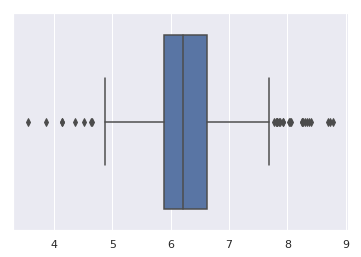

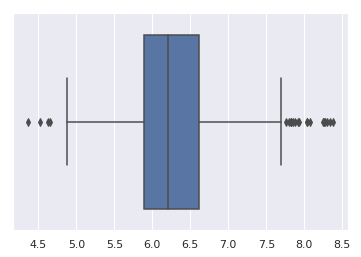

In [31]:
sns.boxplot(df_rm)
plt.show()
sns.boxplot(df_clean)
plt.show()

In [0]:
def iqr_removal(df):
  X = df
  Q1 = X.quantile(0.25)
  Q3 = X.quantile(0.75)
  IQR = Q3 - Q1
  df = df[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]
  
  return df

In [0]:
df_clean = iqr_removal(df[['RM', 'LSTAT']])


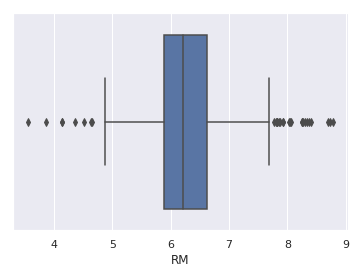

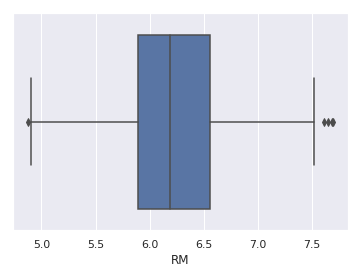

In [34]:
sns.boxplot(df['RM'])
plt.show()
sns.boxplot(df_clean['RM'])
plt.show()

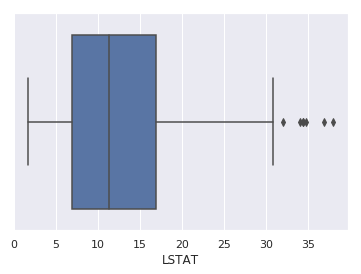

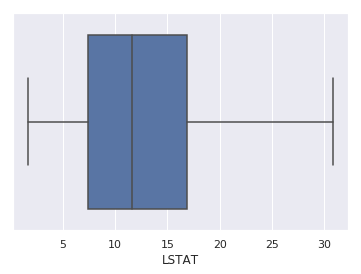

In [35]:
sns.boxplot(df['LSTAT'])
plt.show()
sns.boxplot(df_clean['LSTAT'])
plt.show()